In this project, we gonna tried four different models to classify the images.

- 1. The most basic cnn model we build ourselves
- 2. We refer three different famous CNN model: VggNet, AlexNet and Resnet
- 3. Based on these three model we try to optimize our own model


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation
from keras import models, regularizers, layers, optimizers
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# Get train/test/validation data

train_path = 'drive/My Drive/train'
test_path = 'drive/My Drive/test'
val_path = 'drive/My Drive/valid'

train = ImageDataGenerator(rescale=1./255)
train_data = train.flow_from_directory(train_path,target_size=(225,225),batch_size = 4,class_mode = 'categorical')

test = ImageDataGenerator(rescale=1./255)
test_data = train.flow_from_directory(test_path,target_size=(225,225),batch_size = 16,class_mode = 'categorical')

valid = ImageDataGenerator(rescale=1./255)
valid_data = train.flow_from_directory(val_path,target_size=(225,225),batch_size = 8,class_mode = 'categorical')

Found 31316 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.


## BirdNet

This is a model we build ourselves, thus called BirdNet


In [ ]:
model = models.Sequential()

# 1
model.add(layers.Conv2D(512, (3, 3), activation='relu',input_shape=(225, 225, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2
model.add(Dropout(0.2))
model.add(layers.Conv2D(1024, (3, 3), kernel_regularizer=regularizers.l2(0.001),
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 3
model.add(Dropout(0.2))
model.add(layers.Conv2D(2048, (3, 3), kernel_regularizer=regularizers.l2(0.001),
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 5
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(225, activation='softmax', kernel_initializer='glorot_normal'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 512)     14336     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 512)     0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 512)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 1024)    4719616   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 1024)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 1024)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 2048)      1

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

bird_history = model.fit(train_data, epochs=10, validation_data=valid_data, workers=10, use_multiprocessing=True)

Epoch 1/10
7829/7829 [==============================] - 2229s 285ms/step - loss: 4.4059 - acc: 0.1399 - val_loss: 2.9797 - val_acc: 0.3378
Epoch 2/10
7829/7829 [==============================] - 2230s 285ms/step - loss: 2.6715 - acc: 0.4108 - val_loss: 2.1123 - val_acc: 0.5076
Epoch 3/10
7829/7829 [==============================] - 2228s 285ms/step - loss: 1.8082 - acc: 0.5883 - val_loss: 1.9427 - val_acc: 0.5600
Epoch 4/10
7829/7829 [==============================] - 2228s 285ms/step - loss: 1.1216 - acc: 0.7428 - val_loss: 1.9727 - val_acc: 0.6080
Epoch 5/10
7829/7829 [==============================] - 2228s 285ms/step - loss: 0.6217 - acc: 0.8631 - val_loss: 2.0845 - val_acc: 0.5956
Epoch 6/10
7829/7829 [==============================] - 2230s 285ms/step - loss: 0.3591 - acc: 0.9335 - val_loss: 2.4075 - val_acc: 0.5840
Epoch 7/10
7829/7829 [==============================] - 2231s 285ms/step - loss: 0.2612 - acc: 0.9587 - val_loss: 2.8805 - val_acc: 0.5947
Epoch 8/10
7829/7829 [=====

## AlexNet

 - AlexNet

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import optimizers
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

In [ ]:
class AlexNet8(Model):
    def __init__(self):
        super(AlexNet8, self).__init__()
        
        self.c1 = Conv2D(filters=96, kernel_size=(3, 3))
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool2D(pool_size=(3, 3), strides=2)

        
        self.c2 = Conv2D(filters=256, kernel_size=(3, 3))
        self.b2 = BatchNormalization()
        self.a2 = Activation('relu')
        self.p2 = MaxPool2D(pool_size=(3, 3), strides=2)

       
        self.c3 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
          
        
        self.c4 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
           
       
        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same',
                         activation='relu')
        self.p3 = MaxPool2D(pool_size=(3, 3), strides=2)

        
        self.flatten = Flatten()
        self.f1 = Dense(2048, activation='relu')
        self.d1 = Dropout(0.5)
        self.f2 = Dense(2048, activation='relu')
        self.d2 = Dropout(0.5)
        self.f3 = Dense(225, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)

        x = self.c3(x)

        x = self.c4(x)

        x = self.c5(x)
        x = self.p3(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d1(x)
        x = self.f2(x)
        x = self.d2(x)
        y = self.f3(x)
        return y

In [ ]:
model = AlexNet8()
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

alex_history = model.fit(train_data, epochs=10,validation_data=valid_data,workers=10,use_multiprocessing=True)

Epoch 1/10
7829/7829 [==============================] - 530s 68ms/step - loss: 5.3837 - acc: 0.0089 - val_loss: 5.3341 - val_acc: 0.0062
Epoch 2/10
7829/7829 [==============================] - 529s 68ms/step - loss: 5.0294 - acc: 0.0338 - val_loss: 4.5138 - val_acc: 0.0853
Epoch 3/10
7829/7829 [==============================] - 529s 68ms/step - loss: 3.9400 - acc: 0.1694 - val_loss: 2.7580 - val_acc: 0.3733
Epoch 4/10
7829/7829 [==============================] - 528s 67ms/step - loss: 2.6502 - acc: 0.3914 - val_loss: 1.9861 - val_acc: 0.5227
Epoch 5/10
7829/7829 [==============================] - 528s 67ms/step - loss: 1.6853 - acc: 0.5856 - val_loss: 1.7136 - val_acc: 0.5911
Epoch 6/10
7829/7829 [==============================] - 528s 67ms/step - loss: 0.9913 - acc: 0.7432 - val_loss: 1.6291 - val_acc: 0.6213
Epoch 7/10
7829/7829 [==============================] - 530s 68ms/step - loss: 0.5878 - acc: 0.8397 - val_loss: 1.6366 - val_acc: 0.6276
Epoch 8/10
7829/7829 [===================

## VggNet

- VggNet

In [ ]:
class VGG16(Model):
    def __init__(self):
        super(VGG16, self).__init__()
        

        # 1
        self.c1 = Conv2D(filters=64, kernel_size=(3, 3), padding='same')  
        self.b1 = BatchNormalization()  
        self.a1 = Activation('relu')  
        # 2
        self.c2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', )
        self.b2 = BatchNormalization() 
        self.a2 = Activation('relu')  
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d1 = Dropout(0.2) 
        # 3
        self.c3 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b3 = BatchNormalization() 
        self.a3 = Activation('relu')  
        # 4
        self.c4 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b4 = BatchNormalization()
        self.a4 = Activation('relu') 
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d2 = Dropout(0.2)  # 
        # 5
        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b5 = BatchNormalization()  
        self.a5 = Activation('relu') 
        # 6
        self.c6 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b6 = BatchNormalization()  
        self.a6 = Activation('relu')  
        # 7
        self.c7 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b7 = BatchNormalization()
        self.a7 = Activation('relu')
        self.p3 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d3 = Dropout(0.2)
        # 8
        self.c8 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b8 = BatchNormalization()  
        self.a8 = Activation('relu')  
        # 9
        self.c9 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b9 = BatchNormalization() 
        self.a9 = Activation('relu') 
        # 10
        self.c10 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b10 = BatchNormalization()
        self.a10 = Activation('relu')
        self.p4 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d4 = Dropout(0.2)
        # 11
        self.c11 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b11 = BatchNormalization() 
        self.a11 = Activation('relu')  
        # 12
        self.c12 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b12 = BatchNormalization()  
        self.a12 = Activation('relu') 
        # 13
        self.c13 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b13 = BatchNormalization()
        self.a13 = Activation('relu')
        self.p5 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d5 = Dropout(0.2)

        # 14-18
        self.flatten = Flatten()
        self.f1 = Dense(512, activation='relu')
        self.d6 = Dropout(0.2)
        self.f2 = Dense(512, activation='relu')
        self.d7 = Dropout(0.2)
        self.f3 = Dense(225, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.c3(x)
        x = self.b3(x)
        x = self.a3(x)
        x = self.c4(x)
        x = self.b4(x)
        x = self.a4(x)
        x = self.p2(x)
        x = self.d2(x)

        x = self.c5(x)
        x = self.b5(x)
        x = self.a5(x)
        x = self.c6(x)
        x = self.b6(x)
        x = self.a6(x)
        x = self.c7(x)
        x = self.b7(x)
        x = self.a7(x)
        x = self.p3(x)
        x = self.d3(x)

        x = self.c8(x)
        x = self.b8(x)
        x = self.a8(x)
        x = self.c9(x)
        x = self.b9(x)
        x = self.a9(x)
        x = self.c10(x)
        x = self.b10(x)
        x = self.a10(x)
        x = self.p4(x)
        x = self.d4(x)

        x = self.c11(x)
        x = self.b11(x)
        x = self.a11(x)
        x = self.c12(x)
        x = self.b12(x)
        x = self.a12(x)
        x = self.c13(x)
        x = self.b13(x)
        x = self.a13(x)
        x = self.p5(x)
        x = self.d5(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d6(x)
        x = self.f2(x)
        x = self.d7(x)
        y = self.f3(x)
        return y

In [ ]:
model = VGG16()
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

vgg_history = model.fit(train_data, epochs=10,validation_data=valid_data,workers=10,use_multiprocessing=True)

Epoch 1/10
7829/7829 [==============================] - 468s 60ms/step - loss: 5.3626 - acc: 0.0106 - val_loss: 5.2497 - val_acc: 0.0124
Epoch 2/10
7829/7829 [==============================] - 466s 60ms/step - loss: 5.2054 - acc: 0.0163 - val_loss: 5.0976 - val_acc: 0.0160
Epoch 3/10
7829/7829 [==============================] - 466s 60ms/step - loss: 5.0434 - acc: 0.0255 - val_loss: 4.8308 - val_acc: 0.0356
Epoch 4/10
7829/7829 [==============================] - 466s 59ms/step - loss: 4.8518 - acc: 0.0381 - val_loss: 4.5818 - val_acc: 0.0649
Epoch 5/10
7829/7829 [==============================] - 467s 60ms/step - loss: 4.6416 - acc: 0.0563 - val_loss: 4.3423 - val_acc: 0.0916
Epoch 6/10
7829/7829 [==============================] - 466s 60ms/step - loss: 4.4044 - acc: 0.0833 - val_loss: 4.0545 - val_acc: 0.1182
Epoch 7/10
7829/7829 [==============================] - 467s 60ms/step - loss: 4.1698 - acc: 0.1128 - val_loss: 3.6659 - val_acc: 0.1973
Epoch 8/10
7829/7829 [===================

## ResNet

In [ ]:
class ResnetBlock(Model):

    def __init__(self, filters, strides=1, residual_path=False):
        super(ResnetBlock, self).__init__()
        self.filters = filters
        self.strides = strides
        self.residual_path = residual_path

        self.c1 = Conv2D(filters, (3, 3), strides=strides, padding='same', use_bias=False)
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')

        self.c2 = Conv2D(filters, (3, 3), strides=1, padding='same', use_bias=False)
        self.b2 = BatchNormalization()

        if residual_path:
            self.down_c1 = Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)
            self.down_b1 = BatchNormalization()
        
        self.a2 = Activation('relu')

    def call(self, inputs):
        residual = inputs  
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.a1(x)

        x = self.c2(x)
        y = self.b2(x)

        if self.residual_path:
            residual = self.down_c1(inputs)
            residual = self.down_b1(residual)

        out = self.a2(y + residual)  
        return out

In [ ]:
class ResNet18(Model):

    def __init__(self, block_list, initial_filters=64):  
        super(ResNet18, self).__init__()
        self.num_blocks = len(block_list)  
        self.block_list = block_list
        self.out_filters = initial_filters
        self.c1 = Conv2D(self.out_filters, (3, 3), strides=1, padding='same', use_bias=False)
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.blocks = tf.keras.models.Sequential()
    
        for block_id in range(len(block_list)):  
            for layer_id in range(block_list[block_id]): 
                if block_id != 0 and layer_id == 0:  
                    block = ResnetBlock(self.out_filters, strides=2, residual_path=True)
                else:
                    block = ResnetBlock(self.out_filters, residual_path=False)
                self.blocks.add(block) 
            self.out_filters *= 2  
        self.p1 = tf.keras.layers.GlobalAveragePooling2D()
        self.f1 = tf.keras.layers.Dense(225, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())

    def call(self, inputs):
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.a1(x)
        x = self.blocks(x)
        x = self.p1(x)
        y = self.f1(x)
        return y

In [ ]:
model = ResNet18([2, 2, 2, 2])
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

res_history = model.fit(train_data, epochs=10,validation_data=valid_data,workers=10,use_multiprocessing=True)

Epoch 1/10
7829/7829 [==============================] - 803s 103ms/step - loss: 6.2761 - acc: 0.0584 - val_loss: 5.4902 - val_acc: 0.1067
Epoch 2/10
7829/7829 [==============================] - 803s 103ms/step - loss: 4.7078 - acc: 0.1433 - val_loss: 5.1784 - val_acc: 0.1520
Epoch 3/10
7829/7829 [==============================] - 803s 103ms/step - loss: 4.0884 - acc: 0.2145 - val_loss: 3.8899 - val_acc: 0.2942
Epoch 4/10
7829/7829 [==============================] - 803s 103ms/step - loss: 3.6768 - acc: 0.2827 - val_loss: 4.0268 - val_acc: 0.3040
Epoch 5/10
7829/7829 [==============================] - 803s 103ms/step - loss: 3.3440 - acc: 0.3508 - val_loss: 2.9919 - val_acc: 0.4471
Epoch 6/10
7829/7829 [==============================] - 803s 103ms/step - loss: 3.0602 - acc: 0.4200 - val_loss: 2.9284 - val_acc: 0.4489
Epoch 7/10
7829/7829 [==============================] - 803s 103ms/step - loss: 2.8022 - acc: 0.4797 - val_loss: 2.4365 - val_acc: 0.5280
Epoch 8/10
7829/7829 [============

## Visualization & Comparsion


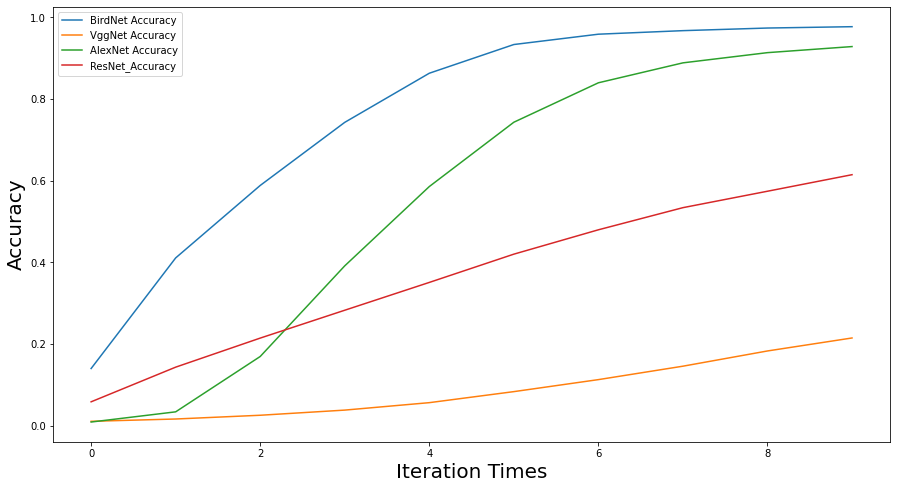

In [ ]:
#Accuracy
plt.figure(figsize=(15,8))
plt.xlabel('Iteration Times', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.plot(bird_history.history['acc'],label='BirdNet Accuracy')
plt.plot(vgg_history.history['acc'],label='VggNet Accuracy')
plt.plot(alex_history.history['acc'],label='AlexNet Accuracy')
plt.plot(res_history.history['acc'],label='ResNet_Accuracy')
plt.legend()
plt.show()

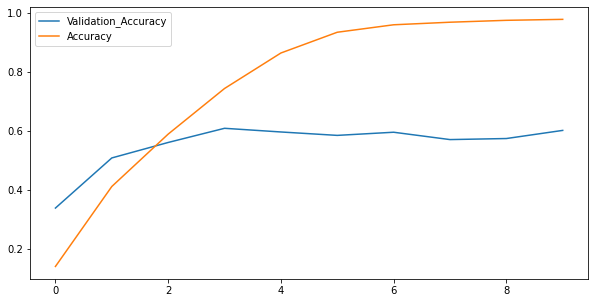

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(bird_history.history['val_acc'],label='Validation_Accuracy')
plt.plot(bird_history.history['acc'],label='Accuracy')
plt.legend()
plt.show()
